<a href="https://colab.research.google.com/github/SaehyunC/localization/blob/master/answer/localization_assignment4_2D_Particle_Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# sim.plot2d

In [8]:
import matplotlib.pyplot as plt
import math

distance = 100


def draw_robot(robot, error):
    line_length = 2
    o = math.sin(robot.theta) * line_length + robot.y
    a = math.cos(robot.theta) * line_length + robot.x
    if error:
        plt.plot([robot.x], [robot.y], 'ro', markersize=6)
    else:
        plt.plot([robot.x], [robot.y], 'ro', markersize=10)
    plt.plot([robot.x, a], [robot.y, o], 'r-', linewidth=4)


def draw_particles(particles, error):
    for particle in particles:
        line_length = 2
        o = math.sin(particle.theta) * line_length + particle.y
        a = math.cos(particle.theta) * line_length + particle.x
        if error:
            plt.plot([particle.x], [particle.y], 'bo', markersize=6)
        else:
            plt.plot([particle.x], [particle.y], 'bo', markersize=10)
        plt.plot([particle.x, a], [particle.y, o], 'b-', linewidth=4)


def draw_poles(poles):
    for pole in poles:
        plt.plot([pole.x], [pole.y], 'gs', markersize=15)


def plot(
        robot,
        particles=None,
        poles=None,
        j=None,
        autorun=False,
        time=1,
        error=False):
    plt.figure(figsize=[8, 8])
    if j is not None:
        plt.title(str(j))
    plt.grid(linestyle='--')
    plt.yticks([0, int(distance / 4), int(distance / 2),
                int(distance * 3 / 4), distance])
    plt.xticks([0, int(distance / 4), int(distance / 2),
                int(distance * 3 / 4), distance])
    if particles is not None:
        draw_particles(particles, error)
    if poles is not None:
        draw_poles(poles)
    draw_robot(robot, error)
    plt.xlim([0, distance])
    plt.ylim([0, distance])
    if error:
        plt.xlim([-distance * 0.2, distance * 1.2])
        plt.ylim([-distance * 0.2, distance * 1.2])

    if autorun:
        if j == 0:
            # Not sure why this is needed but it is.
            plt.pause(time)
        plt.show(block=False)
        plt.pause(time)
        plt.close()
    else:
        plt.show()


def print_particle_error(robot, particles):
    weights = []
    for particle in particles:
        weights += [particle.weight]
    best_particle = weights.index(max(weights))
    diff_x = round(abs(robot.x - particles[best_particle].x), 1)
    diff_y = round(abs(robot.y - particles[best_particle].y), 1)
    diff_pos = round(diff_x + diff_y, 2)
    diff_theta = round(abs(robot.theta - particles[best_particle].theta), 2)
    if diff_theta > math.pi:
        diff_theta = round(abs(diff_theta - math.pi * 2), 2)
    print("Error: [" + str(diff_pos) + ", " + str(diff_theta) + "]")
    print("Weight Sum: " + str(round(sum(weights), 2)))
    print("Max Weight: " + str(round(particles[best_particle].weight, 2)))
    if (diff_pos < 3) and (diff_theta < 0.5):
        print("Converged!")

# filter2d

In [12]:
#from sim.plot2d import plot
import random as r
import math


class Position:
    def __init__(self, pos):
        self.x = pos[0]
        self.y = pos[1]
        self.theta = pos[2]


class Pole(Position):
    def __init__(self, pos):
        Position.__init__(self, pos)


class Measurement:
    def __init__(self, distance, angle):
        self.distance = distance
        self.angle = angle


class Robot(Position):
    def __init__(self, pos):
        Position.__init__(self, pos)
        self.measurements = []
        self.max_measurement = 200

    # Movement is perfectly accurate, even though we are assuming it isn't.
    def move(self, speed, theta_dot):
        ### START STUDENT CODE
        self.theta += 0
        self.x += 0
        self.y += 0
        ### END STUDENT CODE

    def move_with_error(self, speed, theta_dot):
        ### START STUDENT CODE
        self.move(speed, theta_dot)
        ### END STUDENT CODE

    # Measurement is perfectly accurate even though we are assuming it isn't.
    def measure(self, poles):
        ### START STUDENT CODE
        self.measurements = []
        ### END STUDENT CODE


class Particle(Robot):
    def __init__(self, pos):
        Robot.__init__(self, pos)
        self.weight = 0.0
        self.distance_sigma = 5
        self.distance_distribution_peak = 1 / \
            (math.sqrt(2 * math.pi) * self.distance_sigma)
        self.distance_weight = 1
        self.angle_sigma = 0.5
        self.angle_distribution_peak = 1 / \
            (math.sqrt(2 * math.pi) * self.angle_sigma)
        self.angle_weight = 1
        self.theta_dot_sigma = 0.2
        self.speed_sigma = 0.5

    def predict(self, speed, theta_dot):
        ### START STUDENT CODE
        return 0
        ### END STUDENT CODE

    def probability_density_function(self, mu, sigma, x):
        ### START STUDENT CODE
        return 0
        ### END STUDENT CODE

    def update_weight(self, robot_measurements):
        ### START STUDENT CODE
        self.weight = 0
        ### END STUDENT CODE


def resample_particles(particles):
    ### START STUDENT CODE
    resampled_particles = []
    return resampled_particles
    ### END STUDENT CODE

# assignment 4-1

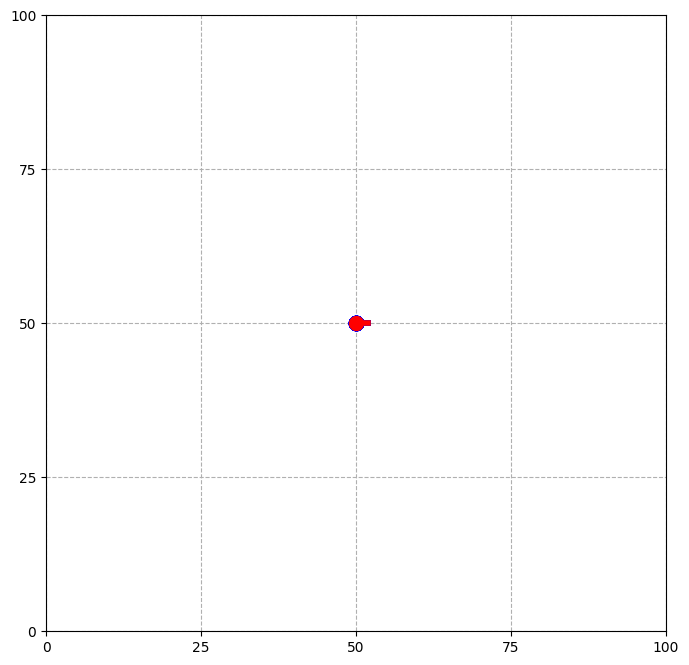

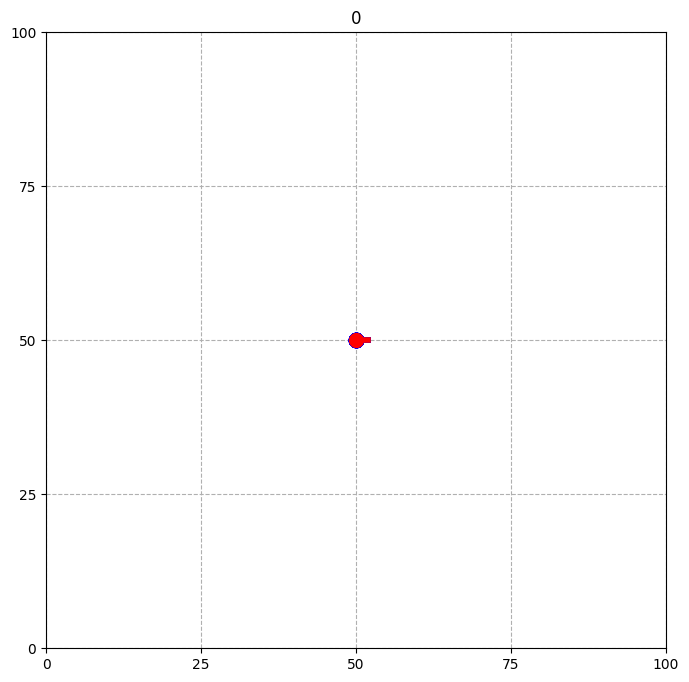

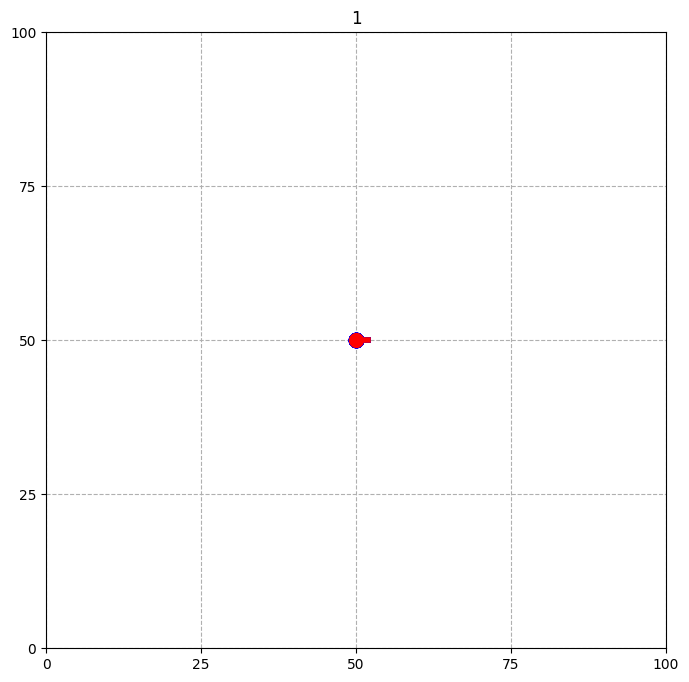

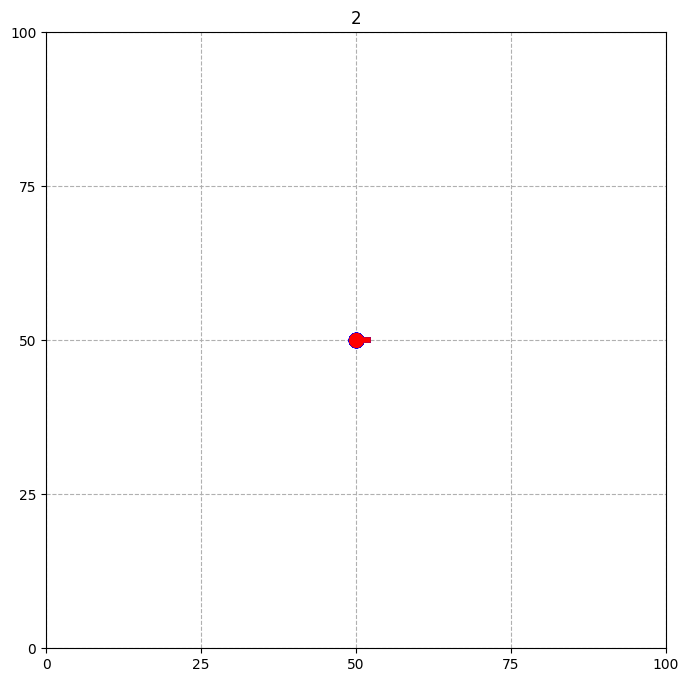

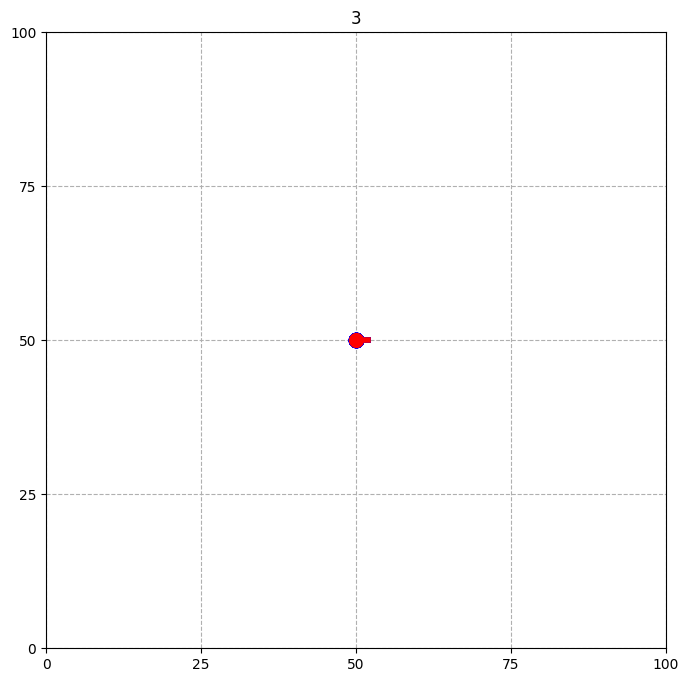

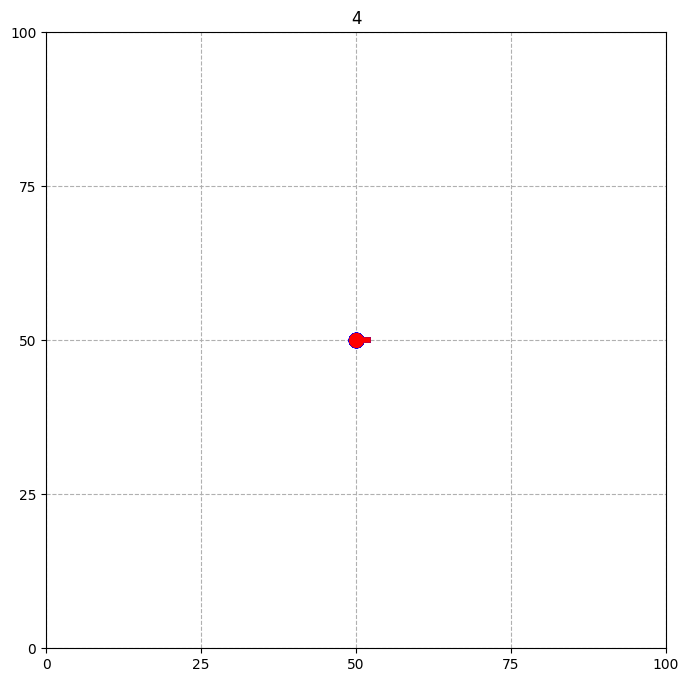

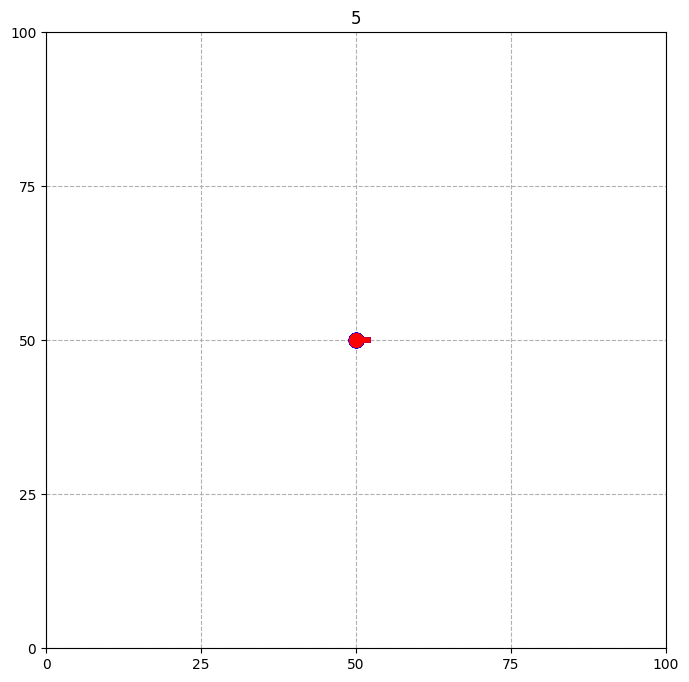

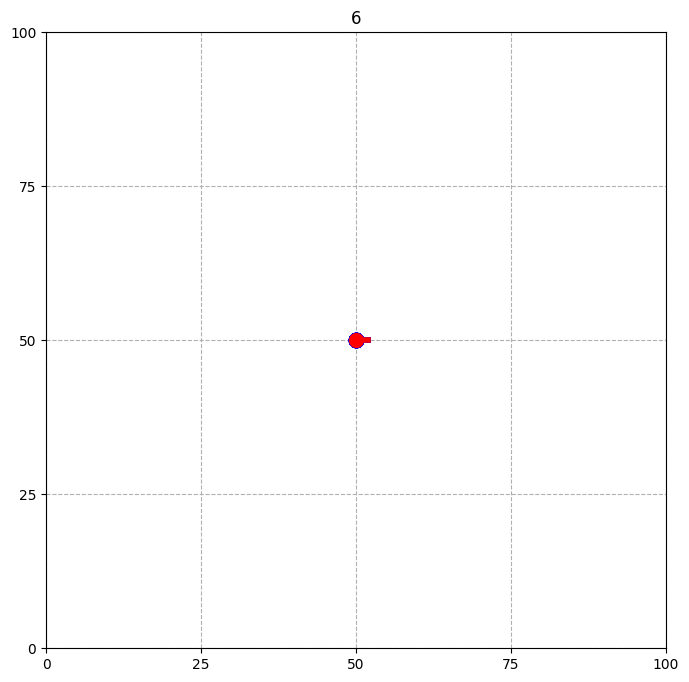

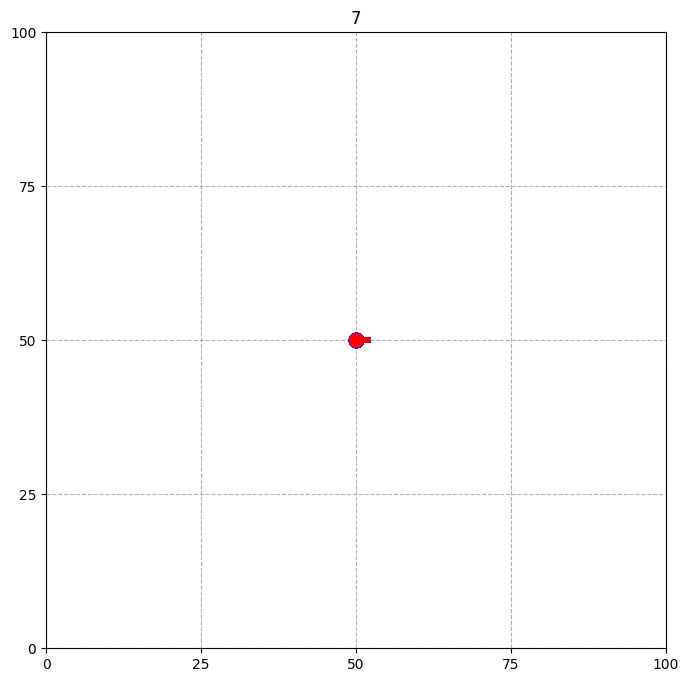

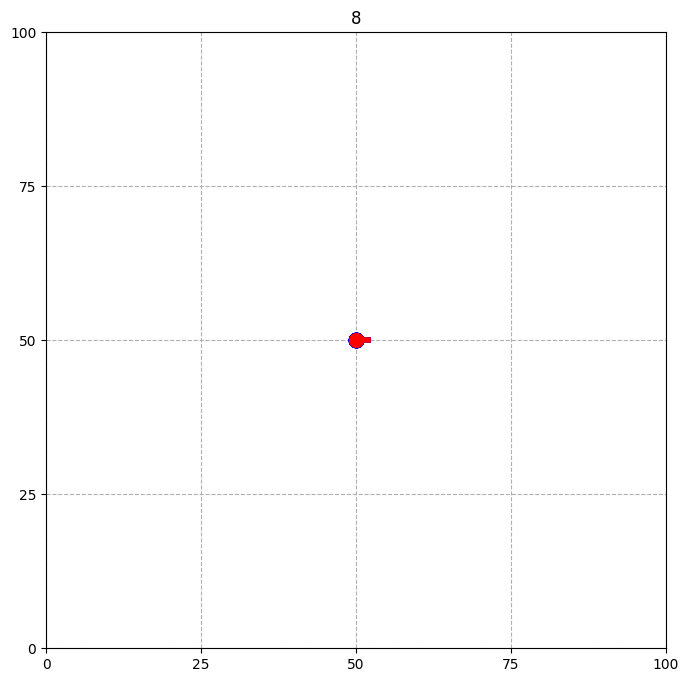

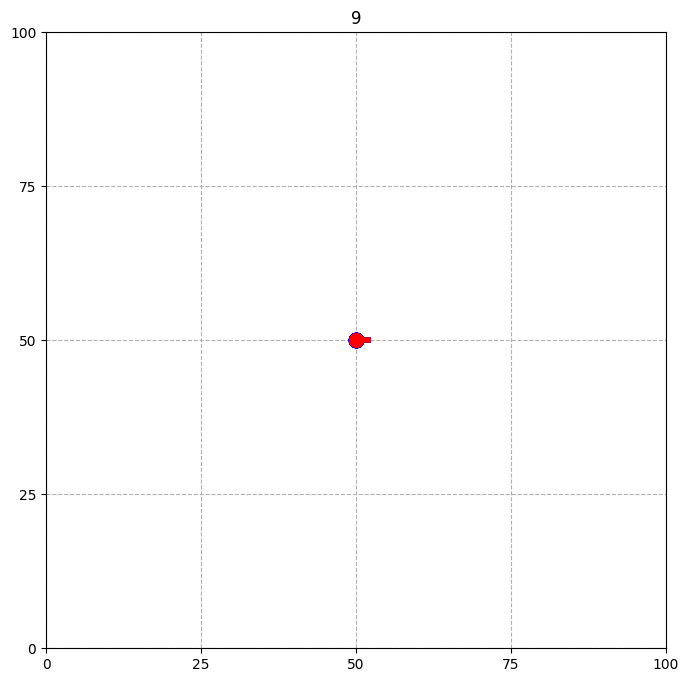

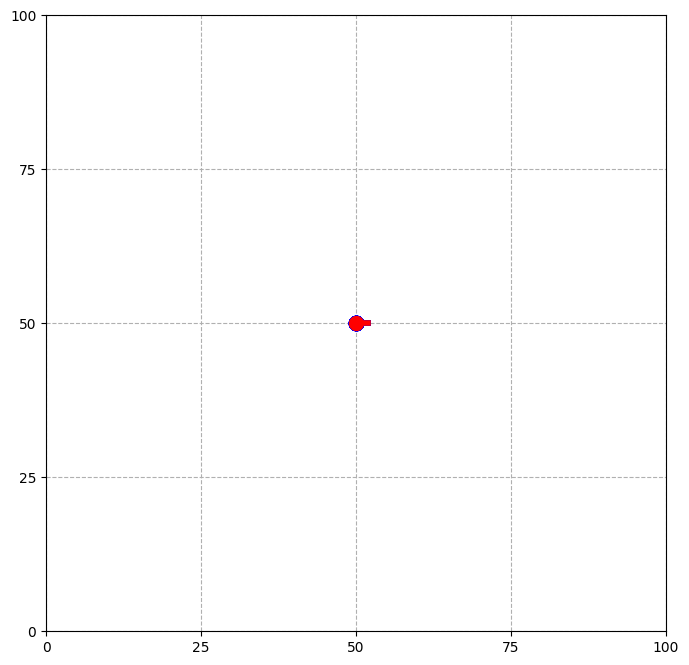

In [13]:
#from filter2d import Robot, Particle
import random as r
import math

robot = Robot([50, 50, 0])
particles = []
for i in range(100):
    particles += [Particle([50, 50, 0])]
plot(robot, particles)

autorun = True
for j in range(10):
    robot.move(5, math.pi * 2 / 10)
    for particle in particles:
        particle.predict(5, math.pi * 2 / 10)
    plot(robot, particles, j=j, autorun=autorun)

plot(robot, particles)

# assignment 4-2

Robot Measurements:

Measurement Answers:
Distance: 56.6 Angle: 0.79
Distance: 30.0 Angle: 0.0
Distance: 20.0 Angle: 1.57
Distance: 25.0 Angle: 3.14


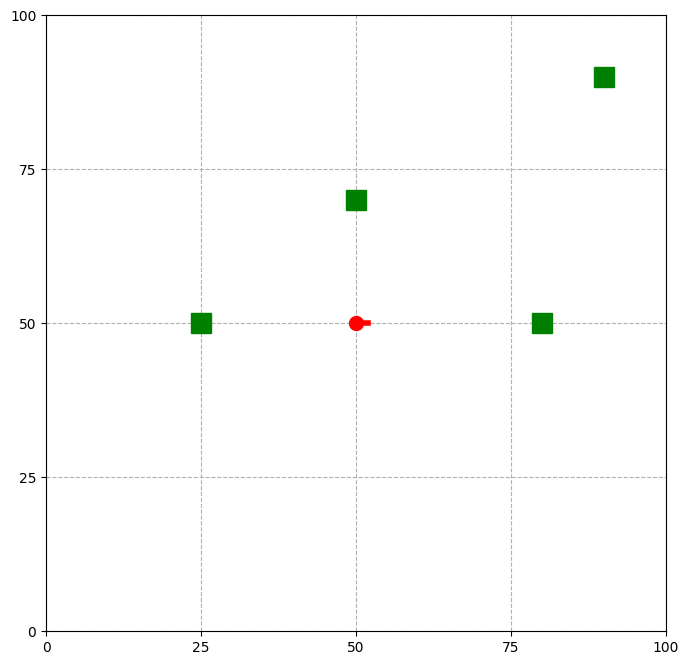

In [14]:
#from sim.plot2d import plot
#from filter2d import Robot, Particle, Pole
import random as r
import math


robot = Robot([50, 50, 0])
poles = [Pole([90, 90, 0]), Pole([80, 50, 0]),
         Pole([50, 70, 0]), Pole([25, 50, 0])]


print("Robot Measurements:")
robot.measure(poles)
for measurement in robot.measurements:
    print("Distance: " + str(round(measurement.distance, 1)) +
          " Angle: " + str(round(measurement.angle, 2)))

print()
print("Measurement Answers:")
print("Distance: 56.6 Angle: 0.79")
print("Distance: 30.0 Angle: 0.0")
print("Distance: 20.0 Angle: 1.57")
print("Distance: 25.0 Angle: 3.14")
plot(robot, poles=poles)

# assignment 4-3

Weight: 0
Weight: 0
Weight: 0
Weight: 0
Weight: 0

Answers:
Weight: 1.0
Weight: 0.54
Weight: 0.0
Weight: 0.12
Weight: 0.25


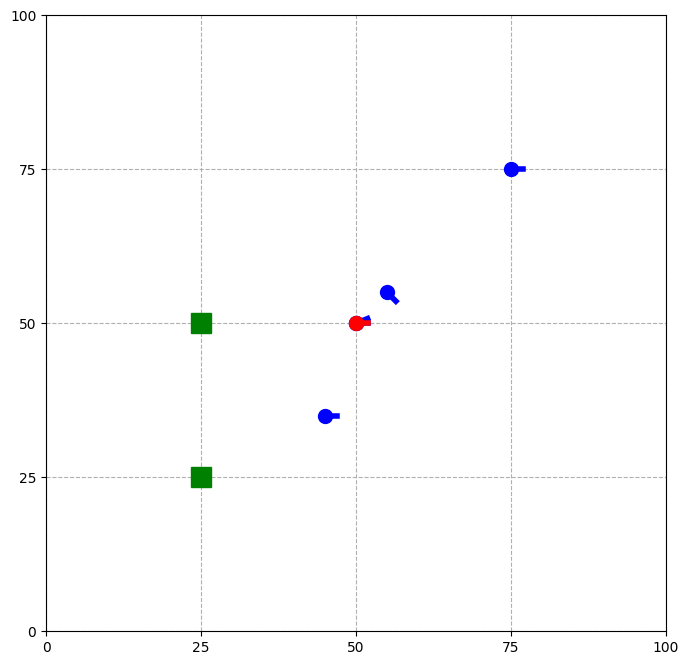

In [15]:
#from sim.plot2d import plot
#from filter2d import Robot, Particle, Pole
import random as r
import math

robot = Robot([50, 50, 0])
poles = [Pole([25, 25, 0])]
# Probably comment for real assignment.
poles += [Pole([25, 50, 0])]
particles = []
particles += [Particle([50, 50, 0])]
particles += [Particle([50, 50, math.pi / 8])]
particles += [Particle([75, 75, 0])]
particles += [Particle([55, 55, -math.pi / 4])]
particles += [Particle([45, 35, 0])]

robot.measure(poles)
for particle in particles:
    particle.measure(poles)
    particle.update_weight(robot.measurements)
    print("Weight: " + str(round(particle.weight, 2)))
    for measure in particle.measurements:
        print("Measurements: " + str(round(measure.distance, 2)))

print()
print("Answers:")
print("Weight: 1.0")
print("Weight: 0.54")
print("Weight: 0.0")
print("Weight: 0.12")
print("Weight: 0.25")
plot(robot, particles, poles)

# assignment 4-4

In [ ]:
#from sim.plot2d import plot, print_particle_error
#from filter2d import Robot, Particle, Pole, resample_particles
import random as r
import math


r.seed(939)
robot = Robot([50, 50, 0])
poles = []
num_poles = 5
for i in range(num_poles):
    x = r.uniform(0, 100)
    y = r.uniform(0, 100)
    poles += [Pole([x, y, 0])]
particles = []
num_particles = 100
for i in range(num_particles):
    x = r.uniform(0, 100)
    y = r.uniform(0, 100)
    theta = r.uniform(0, math.pi * 2)
    particles += [Particle([x, y, theta])]

plot(robot, particles, poles)

robot.measure(poles)
for i in range(20):
    for particle in particles:
        particle.measure(poles)
        particle.update_weight(robot.measurements)
    print_particle_error(robot, particles)
    particles = resample_particles(particles)
    plot(robot, particles, poles, j=i, autorun=True)

# assignment 4-5

In [ ]:
#from sim.plot2d import plot, print_particle_error
#from filter2d import Robot, Particle, Pole, resample_particles
import random as r
import math


# r.seed(939)
robot = Robot([10, 10, 0])
poles = []
num_poles = 5
for i in range(num_poles):
    x = r.uniform(0, 100)
    y = r.uniform(0, 100)
    poles += [Pole([x, y, 0])]
particles = []
num_particles = 100
for i in range(num_particles):
    x = r.uniform(0, 100)
    y = r.uniform(0, 100)
    theta = r.uniform(0, math.pi * 2)
    particles += [Particle([x, y, theta])]

plot(robot, particles, poles)


moves = []
for i in range(60):
    if i < 10:
        moves += [[5, 0]]
        continue
    if i < 20:
        moves += [[5, math.pi / 10]]
        continue
    if i < 30:
        moves += [[-3, -math.pi / 20]]
        continue
    if i < 35:
        moves += [[10, 0]]
        continue
    if i < 45:
        moves += [[2, -math.pi / 5]]
        continue
    if i < 55:
        moves += [[4, math.pi / 20]]
        continue

    moves += [[0, 0]]

for i in range(60):
    # Move and Measure Robot
    robot.move(moves[i][0], moves[i][1])
    robot.measure(poles)
    # Move, Measure, and Update Particles
    for particle in particles:
        particle.predict(moves[i][0], moves[i][1])
        particle.measure(poles)
        particle.update_weight(robot.measurements)

    print_particle_error(robot, particles)
    # Resample
    particles = resample_particles(particles)
    plot(robot, particles, poles, j=i, autorun=True, time=0.5)
plot(robot, particles, poles)

# assignment 4-6

In [ ]:
#from sim.plot2d import plot, print_particle_error
#from filter2d import Robot, Particle, Pole, resample_particles
import random as r
import math


# r.seed(939)
robot = Robot([10, 10, 0])
poles = []
num_poles = 5
for i in range(num_poles):
    x = r.uniform(0, 100)
    y = r.uniform(0, 100)
    poles += [Pole([x, y, 0])]
particles = []
num_particles = 100
for i in range(num_particles):
    x = r.uniform(0, 100)
    y = r.uniform(0, 100)
    theta = r.uniform(0, math.pi * 2)
    particles += [Particle([x, y, theta])]

plot(robot, particles, poles)


moves = []
for i in range(60):
    if i < 10:
        moves += [[5, 0]]
        continue
    if i < 20:
        moves += [[5, math.pi / 10]]
        continue
    if i < 30:
        moves += [[-3, -math.pi / 20]]
        continue
    if i < 35:
        moves += [[10, 0]]
        continue
    if i < 45:
        moves += [[2, -math.pi / 5]]
        continue
    if i < 55:
        moves += [[4, math.pi / 20]]
        continue

    moves += [[0, 0]]

for i in range(60):
    # Move Robot
    robot.move_with_error(moves[i][0], moves[i][1])  # add noise here
    robot.measure(poles)                 # and add noise here
    # Move and Update Particles
    for particle in particles:
        particle.predict(moves[i][0], moves[i][1])
        particle.measure(poles)
        particle.update_weight(robot.measurements)
    # Resample
    print_particle_error(robot, particles)
    particles = resample_particles(particles)
    plot(robot, particles, poles, j=i, autorun=True, time=0.5, error=True)
plot(robot, particles, poles, error=True)